# Group 8 Project
# Group Member Names: Shermeen Khan, Naena Thozuppadan
## Group Member Emails: Shermeen.Khan@Baruchmail.cuny.edu, Naena.Thozuppadan@baruchmail.cuny.edu

### Group Project Assignment: Seeing the impact that COVID-19 has had on the people and economy of NYC. Specifically, to record the impact it had on the residents of the 5 boroughs, we will be recording the number of cases that occurred in NYC. Next, to see how this immediately affected the economic downfall that has occurred since the start of the pandemic, we will be specifically honing into the real estate market. 

### We could've looked into other factors as well but we decided to focus on real estate data becuase it is a good indicator of the economic condition and where COVID-19 had the biggest hit. Much of the information we find hopes to explore the COVID-19 hotspots and how those in turn affected the total price valuations for many of the properties.

## Part 1: Web Scraping Assignment 
### Using functions: requests, headers and headings, css extraction, installing packages like selenium, css, urllib, BeautifulSoup

#### We will be installing any of the necessary packages that we may need for our project.

In [14]:
pip install selenium

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install css

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install cssselect

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


#### First, we will be looking into how the COVID-19 pandemic has affected the people of NYC themselves. We will be looking at the cases that have occurred in NYC already.

#### Seeing the impact of COVID-19 Itself: Web Scraping COVID-19 Data in NYC

#### Sample 1: Import page content from the main COVID-19 data page on NYC.Gov website

In [17]:
import requests
url = 'https://www1.nyc.gov/site/doh/covid/covid-19-data-boroughs.page'
r = requests.get(url)
print (r.text)

<!DOCTYPE html>
<!--[if lt IE 7]><html class="no-js lt-ie9 lt-ie8 lt-ie7"><![endif]--><!--[if IE 7]><html class="no-js lt-ie9 lt-ie8 ie7"><![endif]--><!--[if IE 8]><html class="no-js lt-ie9"><![endif]--><!--[if gt IE 8]><!--><html class="no-js"><!--<![endif]--><head><META http-equiv="Content-Type" content="text/html; charset=UTF-8"><title>COVID-19: Data Main - NYC Health</title><!--
					ls:begin[stylesheet]
				--><link href="/iwov-resources/fixed-layout/3-Row Simple.css" type="text/css" rel="stylesheet"><!--
					ls:end[stylesheet]
				--><!--
					ls:begin[meta-keywords]
				--><meta name="keywords" content=""><!--
					ls:end[meta-keywords]
				--><!--
					ls:begin[meta-description]
				--><meta name="description" content=""><!--
					ls:end[meta-description]
				--><!--
					ls:begin[meta-vpath]
				--><meta name="vpath" content=""><!--
					ls:end[meta-vpath]
				--><!--
					ls:begin[meta-page-locale-name]
				--><meta name="page-locale-name" content=""><!--
					ls:end[meta-pa

#### Import content information from main Statista page

In [18]:
import requests
response = requests.get("https://www.statista.com/statistics/1109817/coronavirus-cases-rates-by-borough-new-york-city/")
t1= response.text
print("Data on Coronavirus Stats page: https://www.statista.com/statistics/1109817/coronavirus-cases-rates-by-borough-new-york-city//")
print(t1)

Data on Coronavirus Stats page: https://www.statista.com/statistics/1109817/coronavirus-cases-rates-by-borough-new-york-city//
<!DOCTYPE html><html lang="en"  prefix="og: http://ogp.me/ns#"><head><meta charset="UTF-8" /><link rel="preconnect" href="https://cdn.statcdn.com" crossorigin><title>&bull;  New York: COVID-19 case rate by borough | Statista</title><meta itemprop="description" name="description" content="Of the five boroughs of New York City, the Bronx has the highest number of coronavirus cases per 100,000 people." /><meta id="gtm_routeName" data-page="statistic.en" /><meta id="gtm_userProductGroup" data-page="anonymous" /><meta id="gtm_accountTypeId" data-page="31" /><meta id="gtm_locale" data-page="en" /><meta id="gtm_pageType" data-page="statistic.en" /><meta id="gtm_userPhase" data-page="content" /><meta id="gtm_userId" data-page="0" /><meta id="gtm_userProductId" data-page="31" /><meta id="gtm_userLog" data-page="false" /><meta id="gtm_lastContentId" data-page="" /><meta 

#### Check whether or not the page contains a title.

In [78]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
def getTitle(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj = BeautifulSoup(html.read(), "lxml")
        title = bsObj.body.h1
    except AttributeError as e:
        return None
    return title
    
    title = getTitle(url)
    if title == None:
      return "Title could not be found"
    else:
      return title

print(getTitle("https://www1.nyc.gov/site/doh/covid/covid-19-data-boroughs.page"))

<h1 class="main-title">COVID-19: Data</h1>


#### Extract and display all the header tags from https://www1.nyc.gov/site/doh/covid/covid-19-data-boroughs.page

In [12]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://www1.nyc.gov/site/doh/covid/covid-19-data-boroughs.page')
bs = BeautifulSoup(html, "html.parser")
titles = bs.find_all(['h1', 'h2','h3','h4','h5','h6'])
print('List all the header tags :', *titles, sep='\n\n')

List all the header tags :

<h2 class="block-title visible-phone">Promoting and Protecting the City's Health</h2>

<h1 class="main-title">COVID-19: Data</h1>

<h1>By Borough</h1>

<h2>Daily Data</h2>

<h2>Data by Borough</h2>

<h3>Bronx</h3>

<h3>Brooklyn</h3>

<h3>Manhattan</h3>

<h3>Queens</h3>

<h3>Staten Island</h3>


#### Extract and display all the image links from https://www.statista.com/statistics/1109817/coronavirus-cases-rates-by-borough-new-york-city/.

In [13]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html = urlopen('https://www.statista.com/statistics/1109817/coronavirus-cases-rates-by-borough-new-york-city/')
bs = BeautifulSoup(html, 'html.parser')
images = bs.find_all('img', {'src':re.compile('.jpg')})
for image in images: 
    print(image['src']+'\n')

https://cdn.statcdn.com/contactPerson/1897.jpg

https://cdn.statcdn.com/static/../CMS/contactperson/ERI1013_1592297846.jpg



### Next, we will be looking at the specific economic conditions in NYC. Here, we will be scraping websites that showed the COVID-19 impact on the real estate property prices and the fluctuations as a result of people buying and selling.

#### Sample 1: Shows what the page is made up of in terms of its content and style.

In [23]:
import requests
from bs4 import BeautifulSoup

r = requests.get("https://www.bloomberg.com/graphics/property-prices/nyc/")
r.content
soup = BeautifulSoup(r.content)
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Bloomberg - Are you a robot?
  </title>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://assets.bwbx.io/font-service/css/BWHaasGrotesk-55Roman-Web,BWHaasGrotesk-75Bold-Web,BW%20Haas%20Text%20Mono%20A-55%20Roman/font-face.css" rel="stylesheet" type="text/css"/>
  <style rel="stylesheet" type="text/css">
   html, body, div, span, applet, object, iframe,
        h1, h2, h3, h4, h5, h6, p, blockquote, pre,
        a, abbr, acronym, address, big, cite, code,
        del, dfn, em, img, ins, kbd, q, s, samp,
        small, strike, strong, sub, sup, tt, var,
        b, u, i, center,
        dl, dt, dd, ol, ul, li,
        fieldset, form, label, legend,
        table, caption, tbody, tfoot, thead, tr, th, td,
        article, aside, canvas, details, embed,
        figure, figcaption, footer, header, hgroup,
        menu, nav, output, ruby, section, summary,
        time, mark, audio, video {
            mar

#### Extracting content from the page using BeautifulSoup.

In [24]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://www.bloomberg.com/graphics/property-prices/nyc/')
res = BeautifulSoup(html.read(),"html5lib");
print(res)

<!DOCTYPE html>
<html><head>
    <title>Bloomberg - Are you a robot?</title>
    <meta content="width=device-width, initial-scale=1" name="viewport"/>
    <link href="https://assets.bwbx.io/font-service/css/BWHaasGrotesk-55Roman-Web,BWHaasGrotesk-75Bold-Web,BW%20Haas%20Text%20Mono%20A-55%20Roman/font-face.css" rel="stylesheet" type="text/css"/>
    <style rel="stylesheet" type="text/css">
        html, body, div, span, applet, object, iframe,
        h1, h2, h3, h4, h5, h6, p, blockquote, pre,
        a, abbr, acronym, address, big, cite, code,
        del, dfn, em, img, ins, kbd, q, s, samp,
        small, strike, strong, sub, sup, tt, var,
        b, u, i, center,
        dl, dt, dd, ol, ul, li,
        fieldset, form, label, legend,
        table, caption, tbody, tfoot, thead, tr, th, td,
        article, aside, canvas, details, embed,
        figure, figcaption, footer, header, hgroup,
        menu, nav, output, ruby, section, summary,
        time, mark, audio, video {
           

#### Extracting some more content from property data website: Property Shark using Beautiful Soup

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://www.propertyshark.com/Real-Estate-Reports/nyc-real-estate-covid19/')
res = BeautifulSoup(html.read(),"html5lib");
print(res)

<html style="height:100%"><head><meta content="NOINDEX, NOFOLLOW" name="ROBOTS"/><meta content="telephone=no" name="format-detection"/><meta content="initial-scale=1.0" name="viewport"/><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><script src="/_Incapsula_Resource?SWJIYLWA=719d34d31c8e3a6e6fffd425f7e032f3" type="text/javascript"></script></head><body style="margin:0px;height:100%"><iframe frameborder="0" height="100%" id="main-iframe" marginheight="0px" marginwidth="0px" src="/_Incapsula_Resource?SWUDNSAI=30&amp;xinfo=12-187105787-0%200NNN%20RT%281600618805957%20108%29%20q%280%20-1%20-1%209%29%20r%280%20-1%29%20B12%2811%2c91579%2c0%29%20U18&amp;incident_id=220000120308883885-1015701384027964172&amp;edet=12&amp;cinfo=0b000000&amp;rpinfo=0&amp;cts=TC553unR9S%2fJe8eDPkTTSC1p4mvP%2fbzpFFYJnWQR09KhwLkz5cCnn4h%2bale9Ffor" width="100%">Request unsuccessful. Incapsula incident ID: 220000120308883885-1015701384027964172</iframe></body></html>


#### Checking whether a page contains a title or not using Beautiful Soup.


In [27]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
def getTitle(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj = BeautifulSoup(html.read(), "lxml")
        title = bsObj.body.h1
    except AttributeError as e:
        return None
    return title
    
    title = getTitle(url)
    if title == None:
      return "Title could not be found"
    else:
      return title

print(getTitle("https://www.bloomberg.com/graphics/property-prices/nyc/"))

<h1 class="logo">Bloomberg</h1>


#### Extract (h1, h2, h3, h4, h5, h6) tag using Beautiful Soup

In [7]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://www.zillow.com/new-york-ny/home-values/')
bs = BeautifulSoup(html, "html.parser")
titles = bs.find_all(['h1', 'h2','h3','h4','h5','h6'])
print('List all the header tags :', *titles, sep='\n\n')

List all the header tags :

<h5>Please verify you're a human to continue.</h5>

<h4 class="uuid-string zsg-fineprint" id="uuid"></h4>


#### Extract h1, h2, h3, h4, h5, h6 header tags using Beautiful Soup

In [37]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://data.cityofnewyork.us/d/fn4k-qyk2/visualization')
bs = BeautifulSoup(html, "html.parser")
titles = bs.find_all(['h1', 'h2','h3','h4','h5','h6'])
print('List all the header tags :', *titles, sep='\n\n')

List all the header tags :

<h2 class="menu-header-title">Menu</h2>


#### This website has a data visualization for demonstrating the number of sold property in the different boroughs. Here, we will try to extract information on the website using Beautiful Soup.

In [42]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://data.cityofnewyork.us/d/fn4k-qyk2/visualization')
res = BeautifulSoup(html.read(),"html5lib");
print(res)

<!DOCTYPE html>
<html lang="en"><!--
  Powered by Socrata
  http://www.socrata.com
  --><head>
    <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
    <meta content="authenticity_token" name="csrf-param"/>
<meta content="b8EstiBjDxtqHVo0uAugfE9c3o6uDYzLADfRA1T49raGFMS3SAgy4pSsymDaqyXO9L6Ra+Yi+WM4nqSsW8i8kg==" name="csrf-token"/>
    
<script>
//<![CDATA[
var socrata = {"currentUser":null,"domain":"data.cityofnewyork.us","domain_id":"75","environment":"production","featureFlags":{"embetter_analytics_page":false,"tyler_privacy_policy":true,"enable_colocate_ui":false,"display_dataset_landing_page_notice":false,"stories_global_filter_enabled":false,"ignore_hiding_columns_unhidden_on_derived_views":true,"feature_map_default_extent":"'{\"southwest\":[39.95606977009003, -75.0146484375],\"northeast\":[41.6195489884308, -71.71875]}'","enable_vertical_filter_bar":true,"enable_region_code_transform":false,"show_system_datasets_in_catalog":true,"retire_get_nbe_migrations_info":false,"domain

#### Trying to parse HTML data from Zillow Website and the Bloomberg Report with property data. 

In [49]:
import requests
r = requests.get ('https://www.zillow.com/new-york-ny/home-values/')
r.text [:200]

'<html><head><meta name="robots" content="noindex, nofollow"/><link href="https://www.zillowstatic.com/vstatic/80d5e73/static/css/z-pages/captcha.css" type="text/css" rel="stylesheet" media="screen"/><'

In [50]:
import urllib3
from bs4 import BeautifulSoup
http = urllib3.PoolManager()
r = http.request('GET', 'https://www.zillow.com/new-york-ny/home-values/')
soup = BeautifulSoup(r.data, 'lxml')
print (soup.title)
print (soup.title.text)

/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<title>New York NY Home Prices &amp; Home Values | Zillow</title>
New York NY Home Prices & Home Values | Zillow


In [52]:
import urllib3
from bs4 import BeautifulSoup
http = urllib3.PoolManager()
r = http.request('GET', 'https://www.bloomberg.com/graphics/property-prices/nyc/')
soup = BeautifulSoup(r.data, 'lxml')
print (soup.title)
print (soup.title.text)

<title>Bloomberg - Are you a robot?</title>
Bloomberg - Are you a robot?


/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## Part 2: NumPy and Pandas
### Using pandas and numpy package (numpy: array, pandas: dictionary, data frame) and combining for plotting graph

### First we will be analyzing the cases across United States as a whole.

#### Using numpy to sort out data of total number of  COVID cases per population group in United States as a whole. This will be used to compare how the COVID 19 compares to the hotspot in NYC.

In [1]:
import numpy as np
data_type = [('age group', 'S15'), ('coviddeaths', int), ('population total', int)]
cases_details = [('Under 1', 20, 3848208), ('1 to 4 years', 15, 15962067),('5 to 14 years', 32, 41075169), ('15 to 24 years', 362, 42970800), ('25 to 34 years', 1513, 45697774), ('35 to 44 years', 3956, 41277888), ('45 to 54 years', 10389, 41631699), ('55 to 64 years', 24772, 42272636), ('65 to 74 years', 41866, 30492316), ('75 to 84 years', 51365, 15394374), ('85 and over', 59801, 6544503)]
cases =  np.array(cases_details, dtype=data_type)

print("Sorted by ages, increasing as population gets older")
print(np.sort(cases, order=['coviddeaths']))

Sorted by ages, increasing as population gets older
[(b'1 to 4 years',    15, 15962067) (b'Under 1',    20,  3848208)
 (b'5 to 14 years',    32, 41075169) (b'15 to 24 years',   362, 42970800)
 (b'25 to 34 years',  1513, 45697774) (b'35 to 44 years',  3956, 41277888)
 (b'45 to 54 years', 10389, 41631699) (b'55 to 64 years', 24772, 42272636)
 (b'65 to 74 years', 41866, 30492316) (b'75 to 84 years', 51365, 15394374)
 (b'85 and over', 59801,  6544503)]


#### Write a Pandas program to convert a Covid Case # dictionary to a Pandas series. This is for cases in United States, helps to summarize total deaths across different ages.

In [4]:
import pandas as pd
coviddictionary = {'Under 1': 20, '1 to 4 years': 15, '5 to 14 years': 32, '15 to 24 years':362, '25 to 34 years':1513, '35 to 44 years': 3956, '45 to 54 years': 10389, '55 to 64 years': 24772, '65 to 74 years':41866, '75 to 84 years': 51365, '85 and over': 59801}
print("Original dictionary:")
print(coviddictionary)
new_series = pd.Series(coviddictionary)
print("Converted series:")
print(new_series)

Original dictionary:
{'Under 1': 20, '1 to 4 years': 15, '5 to 14 years': 32, '15 to 24 years': 362, '25 to 34 years': 1513, '35 to 44 years': 3956, '45 to 54 years': 10389, '55 to 64 years': 24772, '65 to 74 years': 41866, '75 to 84 years': 51365, '85 and over': 59801}
Converted series:
Under 1              20
1 to 4 years         15
5 to 14 years        32
15 to 24 years      362
25 to 34 years     1513
35 to 44 years     3956
45 to 54 years    10389
55 to 64 years    24772
65 to 74 years    41866
75 to 84 years    51365
85 and over       59801
dtype: int64


#### Creating a table to visualize the data that is present from US Stats in each of the COVID categories.

In [5]:
import pandas as pd
data= {
    'Under 1': [20], 
    '1 to 4 years': [15], 
    '5 to 14 years': [32], 
    '15 to 24 years':[362], 
    '25 to 34 years':[1513], 
    '35 to 44 years': [3956], 
    '45 to 54 years': [10389], 
    '55 to 64 years': [24772], 
    '65 to 74 years': [41866], 
    '75 to 84 years': [51365], 
    '85 and over': [59801]
}

covidcases=pd.DataFrame(data)
covidcases

,Under 1,1 to 4 years,5 to 14 years,15 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 and over
0,20,15,32,362,1513,3956,10389,24772,41866,51365,59801


### Using numpy to indicate the number of NYC cases that occurring in each borough. This is to show  COVID is affecting the tri state area. We will be sorting data based on the boroughs.

In [32]:
import numpy as np
data_type = [('Boroughs', 'S15'), ('Cases total', int), ('Hospitalizations total', int), ('coviddeaths', int)]
cases_details = [('Bronx', 2614.57, 642.09, 220.53), ('Brooklyn', 3714.81, 921.56, 281.05),('Manhattan', 1921.1, 520.05, 155.71), ('Queens', 3153.84, 792.75, 264.47), ('Staten Island', 2300.86, 548.11, 189.63)]
# create a structured NumPy array
cases = np.array(cases_details, dtype=data_type)

print("Sort by Boroughs")
print(np.sort(cases, order="Boroughs"))

Sort by Boroughs
[(b'Bronx', 2614, 642, 220) (b'Brooklyn', 3714, 921, 281)
 (b'Manhattan', 1921, 520, 155) (b'Queens', 3153, 792, 264)
 (b'Staten Island', 2300, 548, 189)]


#### Using Pandas data frame to graph the differences between the number of cases and deaths. (dataframe and plotbar)

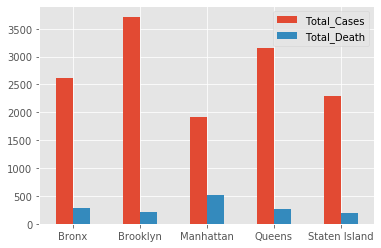

In [33]:
import numpy as np 
import pandas as pd  

Total_Cases = [2614.57, 3714.81, 1921.1, 3153.84, 2300.86]
Total_Death = [281.05, 220.53, 520.05, 264.47, 189.63]
index = ['Bronx', 'Brooklyn', 'Manhattan',
         'Queens', 'Staten Island']

df = pd.DataFrame({'Total_Cases': Total_Cases, 'Total_Death': Total_Death}, index=index)
ax = df.plot.bar(rot=0)

#### Creating table to visualize the change in US median home prices. We can tell overall that the average value is increasing. (dataframe)

In [9]:
import pandas as pd
data = {
    'January 2015': [204229.98],
    'June 2015': [209372.01],
    'January 2016': [216378.63],
    'June 2016': [221328.44],
    'January 2017': [228536.90], 
    'June 2017': [235091.79],
    'January 2018': [245289.35],
    'June 2018': [250835.05],
    'January 2019': [259052.70],
    'June 2019': [263030.91],
    'January 2020': [273633.00],
    'June 2020': [278621.25]
}

ushomeprices= pd.DataFrame(data)
ushomeprices

,January 2015,June 2015,January 2016,June 2016,January 2017,June 2017,January 2018,June 2018,January 2019,June 2019,January 2020,June 2020
0,204229.98,209372.01,216378.63,221328.44,228536.9,235091.79,245289.35,250835.05,259052.7,263030.91,273633.0,278621.25


#### Creating table to visualize the change in NYC median home prices. We can tell there has been a dip that has occurred in overall prices. (dataframe)

In [11]:
import pandas as pd
data = {
    'January 2015': [507000],
    'June 2015': [522000],
    'January 2016': [545000],
    'June 2016': [559000],
    'January 2017': [581000], 
    'June 2017': [596000],
    'January 2018': [621000],
    'June 2018': [640000],
    'January 2019': [654000],
    'June 2019': [655000],
    'January 2020': [649000],
    'June 2020': [651000]
}

nychomeprices= pd.DataFrame(data)
nychomeprices

,January 2015,June 2015,January 2016,June 2016,January 2017,June 2017,January 2018,June 2018,January 2019,June 2019,January 2020,June 2020
0,507000,522000,545000,559000,581000,596000,621000,640000,654000,655000,649000,651000


## Part 3: Merging and Loading Data
### Merging data from csv files and recording information into meaningful output
### Merged excel data (found mean), loaded csv file (removed functionality and converted into Python)

### In this part of the merging and loading of data, we will be loading up sales information from each of the 5 bouroughs using the real estate information from 2019 and 2020. There are thousands of entries in here that will be averaged out to compare the changes in the total average prices and which boroughs took the bigger hits. We will be looking at the relationship between the boroughs and the total cases to find a relationship.


#### Here we will be recording the information for Bronx 2019 and 2020 Home Sales.

In [31]:
import pandas as pd
import numpy as np
Bronx2019 = pd.read_csv('2019Bronx.csv')
print (Bronx2019)

          Town                  Address  Sale Price Sale Date
0     BATHGATE   2327 WASHINGTON AVENUE    110000.0   12/6/19
1     BATHGATE      523 EAST 171 STREET    505000.0  11/14/19
2     BATHGATE      414 EAST 178 STREET    365000.0  11/21/19
3     BATHGATE      507 EAST 183 STREET    440000.0  10/24/19
4     BATHGATE   2141 WASHINGTON AVENUE    549855.0  12/24/19
...        ...                      ...         ...       ...
1323  WOODLAWN           4380 VIREO, 3R    140000.0  10/29/19
1324  WOODLAWN           4380 VIREO, 2S    235000.0  12/19/19
1325  WOODLAWN     4315 WEBSTER AVE, 4J    131721.0  10/28/19
1326  WOODLAWN  4295 WEBSTER AVENUE, 3A    211907.0  10/24/19
1327  WOODLAWN  4295 WEBSTER AVENUE, 4E    192568.0  10/28/19

[1328 rows x 4 columns]


#### Recording the mean from 2019.

In [35]:
import pandas as pd
import numpy as np
Bronx2019 = pd.read_csv('2019Bronx.csv')
Bronx2019['Sale Price'].mean()

1039929.515813253

In [30]:
import pandas as pd
import numpy as np
Bronx2020 = pd.read_csv('2020Bronx.csv')
print (Bronx2020)

          Town                    Address  Sale Price Sale Date
0     BATHGATE           4455 PARK AVENUE    458000.0   1/31/20
1     BATHGATE           4451 PARK AVENUE    475000.0   7/23/20
2     BATHGATE           4451 PARK AVENUE    275000.0   3/16/20
3     BATHGATE        2327 WASHINGTON AVE    165000.0    3/2/20
4     BATHGATE       2052 BATHGATE AVENUE    289000.0   8/25/20
...        ...                        ...         ...       ...
2785  WOODLAWN    4200 HERKIMER PLACE, 4A    140000.0   5/20/20
2786  WOODLAWN  205 EAST 238TH STREET, 1B    255000.0   8/31/20
2787  WOODLAWN    4315 WEBSTER AVENUE, 4L    181750.0    3/5/20
2788  WOODLAWN    4295 WEBSTER AVENUE, L3    129000.0   8/31/20
2789  WOODLAWN    4295 WEBSTER AVENUE, 4F    230000.0   2/24/20

[2790 rows x 4 columns]


#### Recording the mean from 2020.

In [36]:
import pandas as pd
import numpy as np
Bronx2020 = pd.read_csv('2020Bronx.csv')
Bronx2020['Sale Price'].mean()

1395783.1082437276

In [ ]:
## Difference in average sale prices so far:
## In 2019, 1039929.51
## In 2020, 1395783.11
## There has been an increase in the average sales price.

#### Here we will be recording the information for Brooklyn 2019 and 2020 Home Sales.

In [38]:
import pandas as pd
import numpy as np
Brooklyn2019 = pd.read_csv('Brooklyn2019.csv')
print (Brooklyn2019)

         NEIGHBORHOOD                ADDRESS   SALE PRICE  SALE DATE
0          BATH BEACH     231 BAY 7TH STREET      990000.0  10/10/19
1          BATH BEACH    300 BAY 10TH STREET      850000.0  10/29/19
2          BATH BEACH    298 BAY 13TH STREET      717866.0  11/14/19
3          BATH BEACH       8881 16TH AVENUE      858000.0  12/16/19
4          BATH BEACH    331 BAY 13TH STREET      550000.0   11/6/19
...               ...                    ...           ...       ...
3850  WYCKOFF HEIGHTS   1274 FLUSHING AVENUE    12350000.0  11/26/19
3851  WYCKOFF HEIGHTS     12 RIDGEWOOD PLACE      650000.0  12/19/19
3852  WYCKOFF HEIGHTS      335 IRVING AVENUE    11500000.0  11/12/19
3853  WYCKOFF HEIGHTS      333 IRVING AVENUE    11500000.0  11/12/19
3854  WYCKOFF HEIGHTS  358 GROVE STREET, P32      618800.0  10/15/19

[3855 rows x 4 columns]


#### Recording the mean from 2019.

In [46]:
import pandas as pd
import numpy as np
Brooklyn2019 = pd.read_csv('Brooklyn2019.csv')
Brooklyn2019['Sale Price'].mean()

1850405.0845654993

In [19]:
import pandas as pd
import numpy as np
Brooklyn2020 = pd.read_csv('Brooklyn2020.csv')
print (Brooklyn2020)

            NEIGHBORHOOD                    ADDRESS  Sale_Price SALE_DATE
0     BEDFORD STUYVESANT        190 TOMPKINS AVENUE           1    1/1/20
1           BOROUGH PARK       5100 15TH AVENUE, 5O      395000    1/1/20
2           BOROUGH PARK       5100 15TH AVENUE, 4J      395000    1/1/20
3           BOROUGH PARK       5100 15TH AVENUE, 3M      395000    1/1/20
4              BAY RIDGE          311 MARINE AVENUE     1420000    1/2/20
...                  ...                        ...         ...       ...
7770           FLATLANDS      1336 EAST 48TH STREET      670000   9/30/20
7771             MADISON      2070 EAST 29TH STREET      825000   9/30/20
7772    PROSPECT HEIGHTS  679 VANDERBILT AVENUE, 1R      975000   9/30/20
7773            RED HOOK       348 VAN BRUNT STREET      750000   9/30/20
7774      SHEEPSHEAD BAY    2165 BRIGHAM STREET, 1A      175000   9/30/20

[7775 rows x 4 columns]


#### Recording the mean from 2020.

In [20]:
import pandas as pd
import numpy as np
Brooklyn2020 = pd.read_csv('Brooklyn2020.csv')
(Brooklyn2020)['Sale_Price'].mean()

1616775.353697749

In [64]:
## Difference in average sale prices so far:
## In 2019, 1850405.08
## In 2020, 1616776.35
## There has been a dip in the average sale price.

#### Here we will be recording the information for Manhattan 2019 and 2020 Home Sales.

In [50]:
import pandas as pd
import numpy as np
Manhattan2019 = pd.read_csv('Manhattan2019.csv')
print (Manhattan2019)

                  NEIGHBORHOOD                    ADDRESS   SALE PRICE   \
0                ALPHABET CITY     262 EAST 7TH STREET, 4      600000.0   
1                ALPHABET CITY        268 EAST 7TH STREET     4350000.0   
2                ALPHABET CITY        278 EAST 7TH STREET     1269168.0   
3                ALPHABET CITY    209 EAST 7TH STREET, 1W      220000.0   
4                ALPHABET CITY           155 AVENUE C, 5A       84413.0   
...                        ...                        ...           ...   
3230  WASHINGTON HEIGHTS UPPER  255 CABRINI BOULEVARD, 6D      560000.0   
3231  WASHINGTON HEIGHTS UPPER        150 HILLSIDE AVENUE     1066309.0   
3232  WASHINGTON HEIGHTS UPPER        N/A HILLSIDE AVENUE     1066309.0   
3233  WASHINGTON HEIGHTS UPPER              4650 BROADWAY    54000000.0   
3234  WASHINGTON HEIGHTS UPPER              4337 BROADWAY    11700929.0   

     SALE DATE  
0     12/12/19  
1     10/31/19  
2     12/19/19  
3      11/5/19  
4     12/16/19

#### Recording the mean from 2019.

In [23]:
import pandas as pd
import numpy as np
Manhattan2019 = pd.read_csv('Manhattan2019.csv')
Manhattan2019['Sale Price'].mean()

4562487.53137558

In [53]:
import pandas as pd
import numpy as np
Manhattan2020 = pd.read_csv('Manhattan2020.csv')
print (Manhattan2020)

                  NEIGHBORHOOD                     ADDRESS  Sale Price  \
0                ALPHABET CITY         243 EAST 7TH STREET   4350000.0   
1                ALPHABET CITY         272 EAST 7TH STREET         1.0   
2                ALPHABET CITY     278 EAST 7TH STREET, 4C      2500.0   
3                ALPHABET CITY     278 EAST 7TH STREET, 4B      2500.0   
4                ALPHABET CITY  278 EAST 7TH STREET, 6B/6D      2500.0   
...                        ...                         ...         ...   
6590  WASHINGTON HEIGHTS UPPER     40 PINEHURST AVENUE, 5D    873149.0   
6591  WASHINGTON HEIGHTS UPPER         35 OVERLOOK TERRACE  16900000.0   
6592  WASHINGTON HEIGHTS UPPER    524 FT WASHINGTON AVENUE  16900000.0   
6593  WASHINGTON HEIGHTS UPPER         N/A WEST 184 STREET  16900000.0   
6594  WASHINGTON HEIGHTS UPPER       37-41 HILLSIDE AVENUE   8000000.0   

     SALE DATE  
0      7/16/20  
1      6/26/20  
2      2/11/20  
3      2/11/20  
4      2/11/20  
...      

#### Recording the mean from 2020.

In [54]:
import pandas as pd
import numpy as np
Manhattan2020 = pd.read_csv('Manhattan2020.csv')
Manhattan2020['Sale Price'].mean()

4940120.507505686

In [63]:
## Difference in average sale prices so far:
## In 2019, 4562487.53 
## In 2020, 4940120.51
## There has been an increase in the average sale prices.

#### Here we will be recording the information for Queens 2019 and 2020 Home Sales.

In [59]:
import pandas as pd
import numpy as np
Queens2019 = pd.read_csv('Queens2019.csv')
print (Queens2019)

            NEIGHBORHOOD                   ADDRESS  Sale Price SALE DATE
0     AIRPORT LA GUARDIA         21-64 81ST STREET    670000.0   12/6/19
1                ARVERNE         342 BEACH 44TH ST    250000.0   10/4/19
2                ARVERNE         344 BEACH 44TH ST    234500.0  10/24/19
3                ARVERNE       339 BEACH 43 STREET    161750.0  11/21/19
4                ARVERNE       337 BEACH 43 STREET    208750.0  11/21/19
...                  ...                       ...         ...       ...
4558            WOODSIDE    63-14 ROOSEVELT AVENUE   5700000.0  11/20/19
4559            WOODSIDE  51-30 NORTHERN BOULEVARD  40050000.0  10/11/19
4560            WOODSIDE  53-20 NORTHERN BOULEVARD  40050000.0  10/11/19
4561            WOODSIDE  53-22 NORTHERN BOULEVARD  40050000.0  10/11/19
4562            WOODSIDE     41-35 67TH STREET, P6    665000.0  10/17/19

[4563 rows x 4 columns]


#### Recording the mean from 2019.

In [57]:
import pandas as pd
import numpy as np
Queens2019 = pd.read_csv('Queens2019.csv')
Queens2019['Sale Price'].mean()

1255275.5215866754

In [24]:
import pandas as pd
import numpy as np
Queens2020 = pd.read_csv('Queens2020.csv')
print (Queens2020)

          NEIGHBORHOOD                  ADDRESS  Sale_Price SALE_DATE
0              ASTORIA        32-68 41ST STREET     1690673    1/1/20
1              BAYSIDE  35-36 206TH STREET, 369      233888    1/1/20
2              ASTORIA        28-50 36TH STREET     1475000    1/2/20
3              ASTORIA    24-39 38TH STREET, D7      565000    1/2/20
4              ASTORIA    25-96 STEINWAY STREET     2230000    1/2/20
...                ...                      ...         ...       ...
8920      FOREST HILLS  76-66 AUSTIN STREET, 4A      326573   9/30/20
8921            HOLLIS       93-36 208TH STREET      635000   9/30/20
8922       KEW GARDENS       84-32 130TH STREET      885000   9/30/20
8923  SOUTH OZONE PARK      114-15 128TH STREET      450000   9/30/20
8924         WOODHAVEN         9302 90TH AVENUE      999000   9/30/20

[8925 rows x 4 columns]


#### Recording the mean from 2020.

In [25]:
import pandas as pd
import numpy as np
Queens2020 = pd.read_csv('Queens2020.csv')
Queens2020['Sale_Price'].mean()

909663.900280112

In [26]:
## Difference in average sale prices so far:
## In 2019, 1255275.52
## In 2020, 909663.90
## There has been a dip in the average prices in Queens.

In [122]:
import pandas as pd
import numpy as np
StatenIsland2019 = pd.read_csv('StatenIsland2019.csv')
print (StatenIsland2019)

          Town                  Address  Sale Price Sale Date
0     ANNADALE      525 SYCAMORE STREET    775000.0  12/13/19
1     ANNADALE           5 EAGAN AVENUE    460000.0  12/26/19
2     ANNADALE          28 EAGAN AVENUE    450000.0   10/8/19
3     ANNADALE       11 LORRAINE AVENUE    979200.0  10/25/19
4     ANNADALE  620 DRUMGOOLE ROAD EAST    490000.0  10/18/19
...        ...                      ...         ...       ...
1497   WOODROW       105 BERKSHIRE LANE    150000.0  12/16/19
1498   WOODROW       102 BERKSHIRE LANE    844129.0   10/8/19
1499   WOODROW       140 SHARROTTS ROAD    555000.0   12/3/19
1500   WOODROW           27 ROBIN COURT    665000.0  11/18/19
1501   WOODROW           64 ROBIN COURT    675000.0   11/4/19

[1502 rows x 4 columns]


#### Recording the mean from 2019.

In [27]:
import pandas as pd
import numpy as np
StatenIsland2019 = pd.read_csv('StatenIsland2019.csv')
StatenIsland2019['Sale Price'].mean()

690153.9067909454

In [28]:
import pandas as pd
import numpy as np
StatenIsland2020 = pd.read_csv('StatenIslan2020.csv')
print (StatenIsland2020)

     Neighborhood             Address  Sale Price Sale Date
0        ANNADALE  118 ELMBANK STREET    450000.0   6/24/20
1        ANNADALE    7 SANDGAP STREET    525000.0    7/2/20
2        ANNADALE     91 EAGAN AVENUE    480000.0   1/14/20
3        ANNADALE    70 SEGUINE PLACE    455500.0   7/15/20
4        ANNADALE   93 LORRAIN AVENUE    520000.0   6/22/20
...           ...                 ...         ...       ...
2822      WOODROW      38 ROBIN COURT    534072.0   1/21/20
2823      WOODROW    63 PHEASANT LANE    665000.0   4/23/20
2824      WOODROW  88 AMBASSADOR LANE    500000.0   6/18/20
2825      WOODROW      72 HARRIS LANE    500000.0    6/2/20
2826      WOODROW      74 HARRIS LANE    500000.0    6/2/20

[2827 rows x 4 columns]


#### Recording the mean from 2020.

In [125]:
import pandas as pd
import numpy as np
StatenIsland2020= pd.read_csv('StatenIslan2020.csv')
StatenIsland2020['Sale Price'].mean()

606496.2380615494

In [126]:
## Difference in average sale prices so far:
## In 2019, 690153.91
## In 2020, 606496.24
## There has been a dip in the average prices in Staten Island.

In [ ]:
## We can see that dips in average prices occurred in Brooklyn, Queens, and Staten Island.

### Now we will be looking at how the COVID-19 cases compare in the 5 boroughs. This includes looking at the number of deaths and cases that have occurred. Converting the CSV files into Python.

In [68]:
import csv
with open('data-HdO5F.csv', newline='') as csvfile:
 data = csv.reader(csvfile, delimiter=' ', quotechar='|')
 for row in data:
   print(', '.join(row))

DATE_OF_INTEREST,Cases,7-day, average,INCOMPLETE,BASELINE
02/29/2020,1,null,null,0
03/03/2020,1,null,null,0
03/04/2020,5,null,null,0
03/05/2020,3,null,null,0
03/06/2020,8,null,null,0
03/07/2020,7,null,null,0
03/08/2020,21,7,null,0
03/09/2020,57,15,null,0
03/10/2020,70,24,null,0
03/11/2020,155,46,null,0
03/12/2020,357,96,null,0
03/13/2020,619,184,null,0
03/14/2020,642,274,null,0
03/15/2020,1036,419,null,0
03/16/2020,2121,714,null,0
03/17/2020,2452,1055,null,0
03/18/2020,2971,1457,null,0
03/19/2020,3707,1935,null,0
03/20/2020,4007,2419,null,0
03/21/2020,2637,2704,null,0
03/22/2020,2579,2925,null,0
03/23/2020,3570,3132,null,0
03/24/2020,4503,3425,null,0
03/25/2020,4874,3697,null,0
03/26/2020,5048,3888,null,0
03/27/2020,5119,4047,null,0
03/28/2020,3479,4167,null,0
03/29/2020,3562,4308,null,0
03/30/2020,6131,4674,null,0
03/31/2020,5464,4811,null,0
04/01/2020,5451,4893,null,0
04/02/2020,5751,4994,null,0
04/03/2020,5670,5073,null,0
04/04/2020,3866,5128,null,0
04/05/2020,3783,5159,null,0
04/06

#### Using sum functions on all boroughs to records cumulative cases, deaths, and hospitalizations.

In [3]:
import numpy as np
import pandas as pd
Brooklyn=pd.read_csv('Brooklyn.csv')
print ('Cases', Brooklyn['Case'].sum())
print ('Deaths', Brooklyn['Deaths'].sum())
print ('Hospitalization', Brooklyn['Hospitalizations'].sum())

Cases 75773
Deaths 5782
Hospitalization 16772


In [4]:
import numpy as np
import pandas as pd
Bronx=pd.read_csv('Bronx.csv')
print ('Cases', Bronx['Case'].sum())
print ('Deaths', Bronx['Deaths'].sum())
print ('Hospitalization', Bronx['Hospitalization'].sum())

Cases 56864
Deaths 4068
Hospitalization 12727


In [5]:
import numpy as np
import pandas as pd
Manhattan=pd.read_csv('Manhattan.csv')
print ('Cases', Manhattan['Case'].sum())
print ('Deaths', Manhattan['Deaths'].sum())
print ('Hospitalization', Manhattan['Hospitalizations'].sum())

Cases 34775
Deaths 2550
Hospitalization 8299


In [6]:
import numpy as np
import pandas as pd
Queens=pd.read_csv('Queens.csv')
print ('Cases', Queens['Case'].sum())
print ('Deaths', Queens['Death'].sum())
print ('Hospitalization', Queens['Hospitalization'].sum())

Cases 77923
Deaths 6061
Hospitalization 18037


In [7]:
import numpy as np
import pandas as pd
StatenIsland=pd.read_csv('StatenIsland.csv')
print ('Cases', StatenIsland['Cases'].sum())
print ('Deaths', StatenIsland['Deaths'].sum())
print ('Hospitalization', StatenIsland['Hospitalizations'].sum())

Cases 17854
Deaths 919
Hospitalization 2584


### As it can be seen, Brooklyn and Queens saw the highest number of cases and deaths reported in the city. It is definitely clear that they were impacted the most from the COVID-19 pandemic.

In [8]:
left= pd.DataFrame ({'Queens': ['Cases', 'Deaths', 'Hospitalizations'],
                    'Values': [73821.0, 6033.0, 17701.0]})
right=pd.DataFrame ({'Brooklyn': ['Cases', 'Deaths', 'Hospitalizations'],
                    'Values': [70778.0, 5709.0, 16306.0]})

pd.merge(left, right, left_on='Queens', right_on='Brooklyn', how='inner')

,Queens,Values_x,Brooklyn,Values_y
0,Cases,73821.0,Cases,70778.0
1,Deaths,6033.0,Deaths,5709.0
2,Hospitalizations,17701.0,Hospitalizations,16306.0


## Part 4: Data Load Process
### Using different formats like text format, delimited formats, JSON data, binary data formats, etc to get answers. Used functionality like dumps, loads to import information across JSON and Python formats. 

#### First set of information we will be using data load will be with the COVID-19 related statistics in NYC.

#### Writing Python program to convert JSON data to Python object using dumps.

In [23]:
import json
# a Python object (dict):
#highest to lowest cases
python_obj = {
  "Boroughs": ("Bronx", "Staten Island", "Queens","Brooklyn", "Manhattan"),   
"Cases":("3,834", "3488.6", "3,296.67", "2,804.13", "2,034.01")   
}
print(type(python_obj))
# convert into JSON:
j_data = json.dumps(python_obj)

# result is a JSON string:
print(j_data)

<class 'dict'>
{"Boroughs": ["Bronx", "Staten Island", "Queens", "Brooklyn", "Manhattan"], "Cases": ["3,834", "3488.6", "3,296.67", "2,804.13", "2,034.01"]}


#### Writing Python code to convert Python object to JSON data using loads.

In [1]:
import json
json_obj = '{"Name":"Brooklyn, Bronx, Manhattan, Queens, Staten Island", "Recorded Deaths":"5709.0, 4035.0, 2537.0, 6033.0, 906.0"}'
python_obj = json.loads(json_obj)
print ("\nJSON data: ")
print (python_obj)
print ("\nName: ", python_obj ["Name"])
print ("Recorded Deaths: ", python_obj["Recorded Deaths"])


JSON data: 
{'Name': 'Brooklyn, Bronx, Manhattan, Queens, Staten Island', 'Recorded Deaths': '5709.0, 4035.0, 2537.0, 6033.0, 906.0'}

Name:  Brooklyn, Bronx, Manhattan, Queens, Staten Island
Recorded Deaths:  5709.0, 4035.0, 2537.0, 6033.0, 906.0


#### Importing csv to extract the information present. This will be done for all 5 bouroughs information. 

In [9]:
import csv
with open('Brooklyn.csv', newline='') as csvfile:
 data = csv.reader (csvfile, delimiter='\t')
 for row in data:
   print(', '.join(row))

DATE_OF_INTEREST,Case,Hospitalizations,Deaths
2/29/20,0,0,0
3/3/20,0,0,0
3/4/20,1,1,0
3/5/20,3,2,0
3/6/20,1,1,0
3/7/20,2,2,0
3/8/20,5,7,0
3/9/20,16,11,0
3/10/20,11,10,0
3/11/20,31,10,0
3/12/20,96,28,0
3/13/20,166,36,0
3/14/20,163,38,1
3/15/20,433,46,0
3/16/20,740,92,1
3/17/20,783,96,4
3/18/20,966,120,6
3/19/20,1204,152,6
3/20/20,1137,199,11
3/21/20,554,183,12
3/22/20,755,193,10
3/23/20,911,297,27
3/24/20,1212,343,23
3/25/20,1253,409,37
3/26/20,1375,483,50
3/27/20,1424,453,75
3/28/20,862,396,78
3/29/20,1148,447,90
3/30/20,1755,558,106
3/31/20,1517,526,126
4/1/20,1592,506,135
4/2/20,1617,435,170
4/3/20,1441,441,142
4/4/20,922,360,163
4/5/20,1140,386,167
4/6/20,1467,500,169
4/7/20,1400,504,181
4/8/20,1310,450,173
4/9/20,1369,433,190
4/10/20,1152,359,178
4/11/20,1129,316,159
4/12/20,701,271,200
4/13/20,1065,356,158
4/14/20,1036,290,152
4/15/20,881,292,132
4/16/20,883,249,126
4/17/20,960,258,118
4/18/20,575,178,116
4/19/20,635,144,118
4/20/20,983,203,95
4/21/20,897,169,92
4/22/20,854,155,10

In [10]:
import csv
with open('Bronx.csv', newline='') as csvfile:
 data = csv.reader (csvfile, delimiter='\t')
 for row in data:
   print(', '.join(row))

DATE_OF_INTEREST,Case,Hospitalization,Deaths
2/29/20,0.00,0.00,0.00
3/3/20,0.00,0.00,0.00
3/4/20,0.00,0.00,0.00
3/5/20,0.00,0.00,0.00
3/6/20,2.00,1.00,0.00
3/7/20,0.00,1.00,0.00
3/8/20,3.00,2.00,0.00
3/9/20,4.00,6.00,0.00
3/10/20,8.00,4.00,0.00
3/11/20,19.00,19.00,0.00
3/12/20,29.00,12.00,0.00
3/13/20,79.00,30.00,0.00
3/14/20,86.00,24.00,0.00
3/15/20,119.00,35.00,1.00
3/16/20,304.00,69.00,3.00
3/17/20,343.00,63.00,1.00
3/18/20,482.00,107.00,1.00
3/19/20,623.00,126.00,4.00
3/20/20,723.00,119.00,13.00
3/21/20,488.00,160.00,12.00
3/22/20,494.00,168.00,12.00
3/23/20,729.00,221.00,12.00
3/24/20,927.00,267.00,14.00
3/25/20,1064.00,298.00,30.00
3/26/20,998.00,322.00,37.00
3/27/20,1090.00,317.00,36.00
3/28/20,762.00,321.00,62.00
3/29/20,700.00,320.00,55.00
3/30/20,1313.00,341.00,75.00
3/31/20,1283.00,385.00,98.00
4/1/20,1238.00,386.00,93.00
4/2/20,1290.00,367.00,96.00
4/3/20,1450.00,373.00,116.00
4/4/20,1011.00,302.00,107.00
4/5/20,823.00,323.00,123.00
4/6/20,1513.00,403.00,112.00
4/7/20,1464.

In [12]:
import csv
with open('Manhattan.csv', newline='') as csvfile:
 data = csv.reader (csvfile, delimiter='\t')
 for row in data:
   print(', '.join(row))

DATE_OF_INTEREST,Case,Hospitalizations,Deaths
2/29/20,1.00,0.00,0.00
3/3/20,0.00,0.00,0.00
3/4/20,2.00,1.00,0.00
3/5/20,0.00,3.00,0.00
3/6/20,3.00,1.00,0.00
3/7/20,1.00,1.00,0.00
3/8/20,6.00,1.00,0.00
3/9/20,24.00,7.00,0.00
3/10/20,24.00,12.00,0.00
3/11/20,62.00,16.00,0.00
3/12/20,137.00,12.00,0.00
3/13/20,182.00,30.00,0.00
3/14/20,176.00,28.00,0.00
3/15/20,206.00,32.00,2.00
3/16/20,457.00,43.00,0.00
3/17/20,567.00,67.00,0.00
3/18/20,538.00,82.00,4.00
3/19/20,556.00,96.00,4.00
3/20/20,653.00,116.00,11.00
3/21/20,400.00,119.00,5.00
3/22/20,317.00,133.00,8.00
3/23/20,532.00,189.00,7.00
3/24/20,620.00,208.00,17.00
3/25/20,591.00,204.00,20.00
3/26/20,628.00,233.00,33.00
3/27/20,656.00,218.00,42.00
3/28/20,388.00,205.00,28.00
3/29/20,408.00,165.00,35.00
3/30/20,806.00,278.00,34.00
3/31/20,617.00,238.00,43.00
4/1/20,573.00,210.00,59.00
4/2/20,652.00,247.00,62.00
4/3/20,672.00,266.00,51.00
4/4/20,382.00,211.00,64.00
4/5/20,358.00,195.00,86.00
4/6/20,722.00,267.00,69.00
4/7/20,605.00,203.00,92

In [13]:
import csv
with open('Queens.csv', newline='') as csvfile:
 data = csv.reader (csvfile, delimiter='\t')
 for row in data:
   print(', '.join(row))

DATE_OF_INTEREST,Case,Hospitalization,Death
2/29/20,0.00,0.00,0.00
3/3/20,1.00,1.00,0.00
3/4/20,2.00,0.00,0.00
3/5/20,0.00,3.00,0.00
3/6/20,1.00,1.00,0.00
3/7/20,3.00,2.00,0.00
3/8/20,6.00,5.00,0.00
3/9/20,10.00,5.00,0.00
3/10/20,24.00,18.00,0.00
3/11/20,40.00,26.00,1.00
3/12/20,80.00,25.00,0.00
3/13/20,166.00,45.00,0.00
3/14/20,194.00,58.00,1.00
3/15/20,230.00,67.00,1.00
3/16/20,529.00,110.00,4.00
3/17/20,651.00,114.00,3.00
3/18/20,834.00,158.00,9.00
3/19/20,1065.00,169.00,6.00
3/20/20,1184.00,236.00,9.00
3/21/20,947.00,239.00,14.00
3/22/20,695.00,240.00,14.00
3/23/20,1189.00,354.00,28.00
3/24/20,1392.00,379.00,35.00
3/25/20,1572.00,433.00,32.00
3/26/20,1642.00,453.00,60.00
3/27/20,1576.00,449.00,58.00
3/28/20,1201.00,463.00,93.00
3/29/20,1076.00,481.00,95.00
3/30/20,1857.00,584.00,99.00
3/31/20,1809.00,585.00,96.00
4/1/20,1784.00,579.00,144.00
4/2/20,1822.00,600.00,140.00
4/3/20,1762.00,541.00,160.00
4/4/20,1202.00,502.00,158.00
4/5/20,1137.00,422.00,182.00
4/6/20,1925.00,554.00,201.

In [14]:
import csv
with open('StatenIsland.csv', newline='') as csvfile:
 data = csv.reader (csvfile, delimiter='\t')
 for row in data:
   print(', '.join(row))

DATE_OF_INTEREST,Cases,Hospitalizations,Deaths
2/29/20,0.00,0.00,0.00
3/3/20,0.00,0.00,0.00
3/4/20,0.00,0.00,0.00
3/5/20,0.00,0.00,0.00
3/6/20,1.00,1.00,0.00
3/7/20,1.00,0.00,0.00
3/8/20,1.00,0.00,0.00
3/9/20,3.00,1.00,0.00
3/10/20,2.00,4.00,0.00
3/11/20,3.00,2.00,0.00
3/12/20,13.00,2.00,0.00
3/13/20,26.00,3.00,0.00
3/14/20,23.00,6.00,0.00
3/15/20,47.00,16.00,1.00
3/16/20,91.00,16.00,0.00
3/17/20,108.00,19.00,0.00
3/18/20,150.00,24.00,0.00
3/19/20,258.00,28.00,4.00
3/20/20,310.00,31.00,3.00
3/21/20,248.00,35.00,1.00
3/22/20,317.00,29.00,6.00
3/23/20,209.00,50.00,8.00
3/24/20,350.00,47.00,6.00
3/25/20,394.00,52.00,4.00
3/26/20,404.00,52.00,10.00
3/27/20,371.00,64.00,7.00
3/28/20,266.00,53.00,13.00
3/29/20,230.00,58.00,17.00
3/30/20,398.00,74.00,11.00
3/31/20,237.00,69.00,22.00
4/1/20,263.00,76.00,16.00
4/2/20,369.00,83.00,30.00
4/3/20,345.00,66.00,29.00
4/4/20,345.00,54.00,20.00
4/5/20,323.00,68.00,22.00
4/6/20,730.00,82.00,24.00
4/7/20,630.00,71.00,28.00
4/8/20,562.00,59.00,34.00
4/9/2

#### Here, we will be converting the COVID Daily Count of Cases from all of NYC (originally a CSV) to a dictionary.

In [7]:
import csv
with open('COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv', newline='') as csvfile:
 data = csv.DictReader(csvfile)
 print("Case Count")
 print("---------------------------------")
 for row in data:
   print(row)

Case Count
---------------------------------
OrderedDict([('DATE_OF_INTEREST', '2/29/20 0:00'), ('CASE_COUNT', '1'), ('HOSPITALIZED_COUNT', '0'), ('DEATH_COUNT', '0')])
OrderedDict([('DATE_OF_INTEREST', '3/3/20 0:00'), ('CASE_COUNT', '1'), ('HOSPITALIZED_COUNT', '1'), ('DEATH_COUNT', '0')])
OrderedDict([('DATE_OF_INTEREST', '3/4/20 0:00'), ('CASE_COUNT', '5'), ('HOSPITALIZED_COUNT', '2'), ('DEATH_COUNT', '0')])
OrderedDict([('DATE_OF_INTEREST', '3/5/20 0:00'), ('CASE_COUNT', '3'), ('HOSPITALIZED_COUNT', '8'), ('DEATH_COUNT', '0')])
OrderedDict([('DATE_OF_INTEREST', '3/6/20 0:00'), ('CASE_COUNT', '8'), ('HOSPITALIZED_COUNT', '5'), ('DEATH_COUNT', '0')])
OrderedDict([('DATE_OF_INTEREST', '3/7/20 0:00'), ('CASE_COUNT', '7'), ('HOSPITALIZED_COUNT', '6'), ('DEATH_COUNT', '0')])
OrderedDict([('DATE_OF_INTEREST', '3/8/20 0:00'), ('CASE_COUNT', '21'), ('HOSPITALIZED_COUNT', '15'), ('DEATH_COUNT', '0')])
OrderedDict([('DATE_OF_INTEREST', '3/9/20 0:00'), ('CASE_COUNT', '57'), ('HOSPITALIZED_COUN

#### Writing a python program to find the longest words in the provided text file.

In [17]:
def longest_word(filename):
    with open(filename, 'r') as infile:
              words = infile.read().split()
    max_len = len(max(words, key=len))
    return [word for word in words if len(word) == max_len]

print(longest_word('data-UVbiI.csv'))

['BOROUGH_GROUP,,Confirmed,,Probable']


#### Using openpyxl to load Excel Data of Real Estate Information to Python.

In [14]:
import openpyxl
wb = openpyxl.load_workbook('Manhattan2019.xlsx')
type(wb)
wb.get_sheet_names()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  after removing the cwd from sys.path.


['Sheet1']

#### Loading in Excel Information from only the cells A1:C3 to see the information written down- just another way of analyzing the information and content in Excel file. Only looking at data from 2019 here- nothing much to compare.

#### This is for the Brooklyn xlsx file.

In [29]:
import openpyxl
wb = openpyxl.load_workbook('Brooklyn2019.xlsx')
sheet = wb.get_sheet_by_name('Sheet1')
tuple(sheet['A1':'C3'])

for rowOfCellObjects in sheet['A1':'C3']:
    for cellObj in rowOfCellObjects:
        print(cellObj.coordinate, cellObj.value)
        print('--- END OF ROW ---')

A1 NEIGHBORHOOD
--- END OF ROW ---
B1 ADDRESS
--- END OF ROW ---
C1 ZIP CODE
--- END OF ROW ---
A2 BATH BEACH
--- END OF ROW ---
B2 231 BAY 7TH STREET
--- END OF ROW ---
C2 11228
--- END OF ROW ---
A3 BATH BEACH
--- END OF ROW ---
B3 300 BAY 10TH STREET
--- END OF ROW ---
C3 11228
--- END OF ROW ---


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


#### This one is for the Bronx xlsx file.

In [32]:
import openpyxl
wb = openpyxl.load_workbook('2019Bronx.xlsx')
sheet = wb.get_sheet_by_name('Sheet1')
tuple(sheet['A1':'C3'])

for rowOfCellObjects in sheet['A1':'C3']:
    for cellObj in rowOfCellObjects:
        print(cellObj.coordinate, cellObj.value)
        print('--- END OF ROW ---')

A1 Bronx Rolling Sales File.  All Sales From  October 2019 - September 2020
--- END OF ROW ---
B1 None
--- END OF ROW ---
C1 None
--- END OF ROW ---
A2 BATHGATE
--- END OF ROW ---
B2 A9
--- END OF ROW ---
C2 2327 WASHINGTON AVENUE
--- END OF ROW ---
A3 BATHGATE
--- END OF ROW ---
B3 B1
--- END OF ROW ---
C3 523 EAST 171 STREET
--- END OF ROW ---


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


#### This one is for the Manhattan xlsx file.

In [24]:
import openpyxl
wb = openpyxl.load_workbook('Manhattan2019.xlsx')
sheet = wb.get_sheet_by_name('Sheet1')
tuple(sheet['A1':'C3'])

for rowOfCellObjects in sheet['A1':'C3']:
    for cellObj in rowOfCellObjects:
        print(cellObj.coordinate, cellObj.value)
        print('--- END OF ROW ---')

A1 Manhattan Rolling Sales File.  All Sales From  October 2019 - September 2020
--- END OF ROW ---
B1 None
--- END OF ROW ---
C1 None
--- END OF ROW ---
A2 For sales prior to the Final, Neighborhood Name and Descriptive Data reflect the Final Roll 2019/20. Sales after the Final Roll, Neighborhood Name and Descriptive Data reflect current data
--- END OF ROW ---
B2 None
--- END OF ROW ---
C2 None
--- END OF ROW ---
A3 Building Class Category is based on Building Class at Time of Sale.
--- END OF ROW ---
B3 None
--- END OF ROW ---
C3 None
--- END OF ROW ---


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


#### This one is for the Queens xlsx.

In [27]:
import openpyxl
wb = openpyxl.load_workbook('Queens2019.xlsx')
sheet = wb.get_sheet_by_name('Sheet1')
tuple(sheet['A1':'C3'])

for rowOfCellObjects in sheet['A1':'C3']:
    for cellObj in rowOfCellObjects:
        print(cellObj.coordinate, cellObj.value)
        print('--- END OF ROW ---')

A1 Queens Rolling Sales File.  All Sales From  October 2019 - September 2020
--- END OF ROW ---
B1 None
--- END OF ROW ---
C1 None
--- END OF ROW ---
A2 For sales prior to the Final, Neighborhood Name and Descriptive Data reflect the Final Roll 2019/20. Sales after the Final Roll, Neighborhood Name and Descriptive Data reflect current data
--- END OF ROW ---
B2 None
--- END OF ROW ---
C2 None
--- END OF ROW ---
A3 Building Class Category is based on Building Class at Time of Sale.
--- END OF ROW ---
B3 None
--- END OF ROW ---
C3 None
--- END OF ROW ---


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


#### This one is for the Staten Island xlsx. 

In [34]:
import openpyxl
wb = openpyxl.load_workbook('StatenIsland2019.xlsx')
sheet = wb.get_sheet_by_name('Sheet1')
tuple(sheet['A1':'C3'])

for rowOfCellObjects in sheet['A1':'C3']:
    for cellObj in rowOfCellObjects:
        print(cellObj.coordinate, cellObj.value)
        print('--- END OF ROW ---')

A1 Staten Island Rolling Sales File.  All Sales From October 2019 - September 2020
--- END OF ROW ---
B1 None
--- END OF ROW ---
C1 None
--- END OF ROW ---
A2 For sales prior to the Final, Neighborhood Name and Descriptive Data reflect the Final Roll 2019/20. Sales after the Final Roll, Neighborhood Name and Descriptive Data reflect current data
--- END OF ROW ---
B2 None
--- END OF ROW ---
C2 None
--- END OF ROW ---
A3 Building Class Category is based on Building Class at Time of Sale.
--- END OF ROW ---
B3 None
--- END OF ROW ---
C3 None
--- END OF ROW ---


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


## Part 5: Data Aggregation and Data Visualization
### Using packages like pandas, numpy, matplotlib.pyplot, seaborn, and machine learning. Including functions like plot.bar, title, axis, xlabel, ylabel, subplots, max_rows, min_rows, width, etc. 

#### First, we will be taking a look at specifically at the patterns that occurred in the real estate market long term. We will be looking at data from 2010 and then 2019. We expect it to naturally increase because real estate prices tend to increase over time. The goal of our project is to show how the COVID-19 pandemic may have lead to a change in the average prices especially near the time when quarantine began.

Text(0.5, 1.0, '2010 Mean Selling property price for the 5 Boroughs')

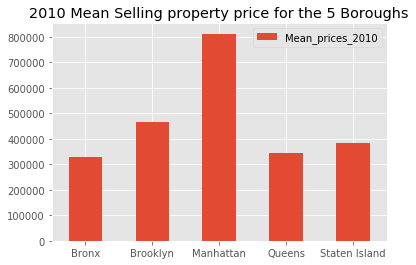

In [34]:
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd  

Mean_prices_2010 = [330000, 466000, 812000, 345000, 385000]

index = ['Bronx', 'Brooklyn', 'Manhattan',
         'Queens', 'Staten Island']

df = pd.DataFrame({'Mean_prices_2010': Mean_prices_2010}, index=index)
ax = df.plot.bar(rot=0)

ax.set_title("2010 Mean Selling property price for the 5 Boroughs")

#### Next, we will be taking a look at the patterns in 2019 so we can see how the trend was going around the time when the real estate market began to change in 2020. 2020 data will be shown right after.

Text(0.5, 1.0, '2019 Mean Selling property price for the 5 Boroughs')

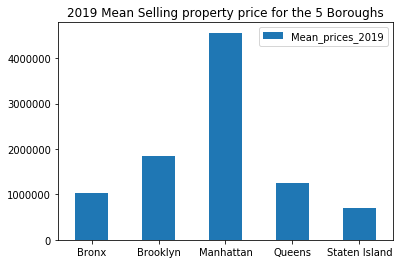

In [3]:
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd  

Mean_prices_2019 = [1039929.51, 1850405.08, 4562487.53, 1255275.52, 690153.91]

index = ['Bronx', 'Brooklyn', 'Manhattan',
         'Queens', 'Staten Island']

df = pd.DataFrame({'Mean_prices_2019': Mean_prices_2019}, index=index)
ax = df.plot.bar(rot=0)

ax.set_title("2019 Mean Selling property price for the 5 Boroughs")

Text(0.5, 1.0, '2020 Mean Selling property price for the 5 Boroughs')

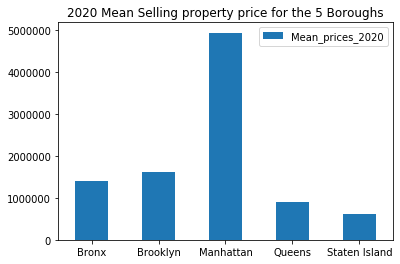

In [29]:
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd  

Mean_prices_2020 = [1395783.11,  1616776.35, 4940120.51, 909663.90, 606496.24]

index = ['Bronx', 'Brooklyn', 'Manhattan',
         'Queens', 'Staten Island']

df = pd.DataFrame({'Mean_prices_2020': Mean_prices_2020}, index=index)
ax = df.plot.bar(rot=0)
ax.set_title("2020 Mean Selling property price for the 5 Boroughs")

#### This graph directly compares the difference in the average mean selling price from 2010, 2019, and 2020. We can see that the overall mean prices increased in Bronx and Manhattan while they decreased in Brooklyn, Queens, and Staten Island. This pattern is coming up again, however this time including Staten Island where the economy took a hit. Next, we will be looking at how the patterns range in cases, hospitalizations and deaths across the 5 boroughs.

Text(0.5, 1.0, 'Comparing the Mean Selling property price for the 5 Boroughs')

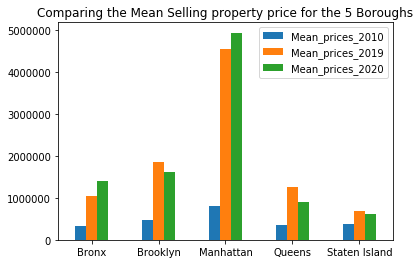

In [30]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd  

Mean_prices_2010 = [330000, 466000, 812000, 345000, 385000]
Mean_prices_2019 = [1039929.51, 1850405.08, 4562487.53, 1255275.52, 690153.91]
Mean_prices_2020 = [1395783.11,  1616776.35, 4940120.51, 909663.90, 606496.24]

index = ['Bronx', 'Brooklyn', 'Manhattan',
         'Queens', 'Staten Island']

df = pd.DataFrame({'Mean_prices_2010': Mean_prices_2010,'Mean_prices_2019': Mean_prices_2019, 'Mean_prices_2020': Mean_prices_2020}, index=index)
ax = df.plot.bar(rot=0)
ax.set_title("Comparing the Mean Selling property price for the 5 Boroughs")

#### Bronx sales began to increase later in 2019. There were fluctuations in the overall sales throughout 2020. There were sales happening pretty much all year, with a few sales over 1 million happening too.

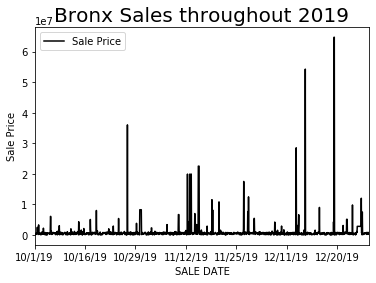

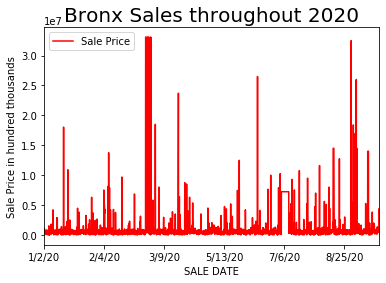

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bronx2019=pd.read_csv('2019Bronx.csv')
bronx2019.plot(y=['Sale Price'], x='Sale Date', color='black')
plt.title('Bronx Sales throughout 2019', fontsize=20)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
plt.xlabel ('SALE DATE')
plt.ylabel ('Sale Price')
plt.show()

bronx=pd.read_csv('2020Bronx.csv')
bronx.plot(y=['Sale Price'], x='Sale Date', color='red')
plt.title('Bronx Sales throughout 2020', fontsize=20)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
plt.xlabel ('SALE DATE')
plt.ylabel ('Sale Price in hundred thousands')
plt.show()

#### Brooklyn sales began to increase later in 2019. There were fluctuations in the overall sales throughout 2020. However, it is clear that after mid February early March, the overall price valuation for the properties was decreasing. Most sales happening after June were going for less than 1 million.

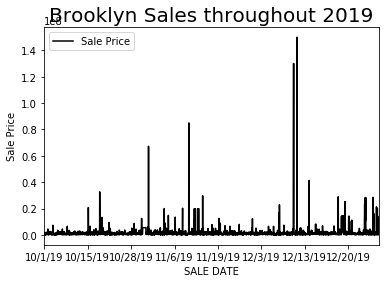

<function matplotlib.pyplot.show(*args, **kw)>

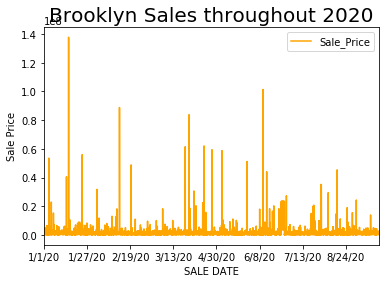

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

brooklyn2019=pd.read_csv('Brooklyn2019.csv')
brooklyn2019.plot(y=['Sale Price'], x='SALE DATE', color='black')
plt.title('Brooklyn Sales throughout 2019', fontsize=20)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
plt.xlabel ('SALE DATE')
plt.ylabel ('Sale Price')
plt.show()

brooklyn=pd.read_csv('Brooklyn2020.csv')
brooklyn.plot(y=['Sale_Price'], x='SALE_DATE',color='orange')
plt.title('Brooklyn Sales throughout 2020', fontsize=20)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
plt.xlabel ('SALE DATE')
plt.ylabel ('Sale Price')
plt.show

#### Manhattan sales were happening thoughout 2019, with many sales of over 1 million. There were fluctuations in the overall sales throughout 2020. However, it is clear that after mid March, some of the bigger real estate properties that go for over a million, like the penthouses and luxury apartments, were most likely not being bought because of how the economy took a toll.

<function matplotlib.pyplot.show(*args, **kw)>

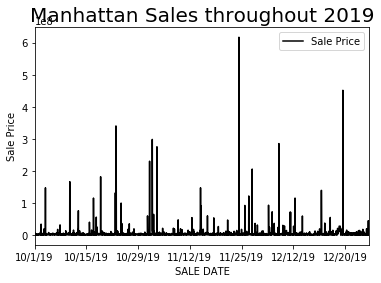

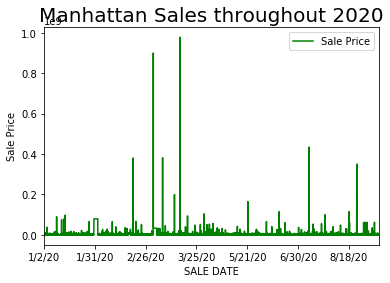

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

manhattan=pd.read_csv('Manhattan2019.csv')
manhattan.plot(y= 'Sale Price', x='SALE DATE', color='black')
plt.title('Manhattan Sales throughout 2019', fontsize=20)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
plt.xlabel ('SALE DATE')
plt.ylabel ('Sale Price')
plt.show

manhattan=pd.read_csv('Manhattan2020.csv')
manhattan.plot(y= 'Sale Price', x='SALE DATE', color='green')
plt.title('Manhattan Sales throughout 2020', fontsize=20)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
plt.xlabel ('SALE DATE')
plt.ylabel ('Sale Price')
plt.show

#### Queens sales were happening thoughout 2019, most being less than 1 million dollars. However, soon during 2020, those prices fluctuated massively. Most of the big sales occurred time by time in cycles.

<function matplotlib.pyplot.show(*args, **kw)>

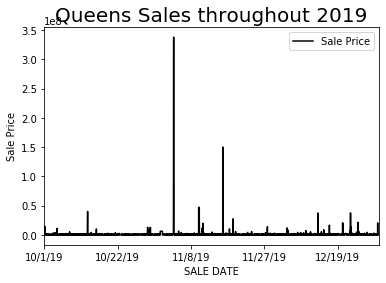

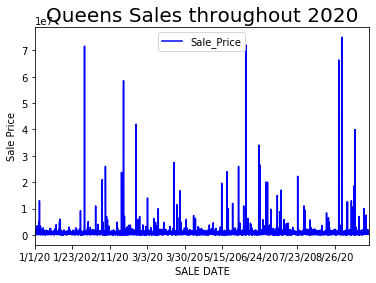

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

queens=pd.read_csv('Queens2019.csv')
queens.plot(y= 'Sale Price', x='SALE DATE', color='black')
plt.title('Queens Sales throughout 2019', fontsize=20)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
plt.xlabel ('SALE DATE')
plt.ylabel ('Sale Price')
plt.show

queens=pd.read_csv('Queens2020.csv')
queens.plot(y= 'Sale_Price', x='SALE_DATE', color='blue')
plt.title('Queens Sales throughout 2020', fontsize=20)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
plt.xlabel ('SALE DATE')
plt.ylabel ('Sale Price')
plt.show

#### Staten Island sales were happening thoughout 2019, with only a few sales being over 1 million. Otherwise, they were being sold in the hundred thoudsnds. However, soon during 2020, those prices fluctuated massively. Most of the big sales occurred time by time in cycles.

Text(0, 0.5, 'Sale Price')

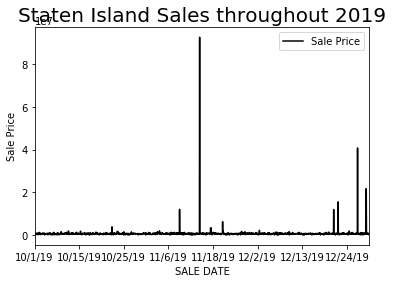

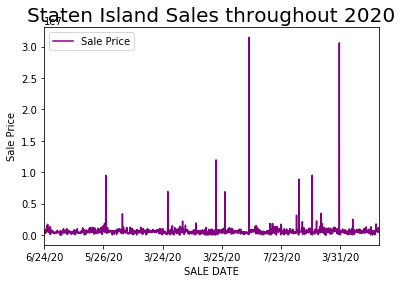

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

statenisland=pd.read_csv('StatenIsland2019.csv')
statenisland.plot(y= 'Sale Price', x='Sale Date', color='black')
plt.title('Staten Island Sales throughout 2019', fontsize=20)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
plt.xlabel ('SALE DATE')
plt.ylabel ('Sale Price')

statenisland=pd.read_csv('StatenIslan2020.csv')
statenisland.plot(y= 'Sale Price', x='Sale Date', color='purple')
plt.title('Staten Island Sales throughout 2020', fontsize=20)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
plt.xlabel ('SALE DATE')
plt.ylabel ('Sale Price')

### Looking at all of the 5 boroughs, it is interesting to see the  changes that have occurred in the overall selling prices. In Bronx and Manhattan, the overall mean selling price increased. In Brooklyn, Queens, and Staten Island, the mean prices fell from 2019 and 2020. It is clear from the bar graph, we can see the dip that has occurred overall. We will be comparing this now with the patterns that occurred in the number of cases, hospitalizations, and deaths in NYC.

#### Taking it a step further, we used machine learning modeling with sklearn and KNeighbors to help predict where sales are going to go and how trends will continue to be. Here is a describe function using pandas to see the mean, std, min, etc (stats functions) on specifically Queens and Brooklyn).

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Brooklyn_Queens.csv')

df['Brooklyn_Sale_Price'].replace(to_replace="?", value='four', inplace=True)
df['BROOKLYN_SALE_DATE'].replace(to_replace="?", value=np.nan, inplace=True)
df['BROOKLYN_SALE_DATE'].astype(float)
df.describe()

,Queens_Sale_Price,QUEENS_SALE_DATE,Unnamed: 2,Unnamed: 3,Brooklyn_Sale_Price,BROOKLYN_SALE_DATE
count,8.925000e+03,8925.000000,0.0,0.0,7.775000e+03,7775.000000
mean,9.096639e+05,43952.353950,NaN,NaN,1.616775e+06,43950.535691
std,2.716779e+06,81.838434,NaN,NaN,4.622388e+06,79.599712
min,1.000000e+00,43831.000000,NaN,NaN,1.000000e+00,43831.000000
25%,3.600000e+05,43875.000000,NaN,NaN,5.124345e+05,43879.000000
50%,6.000000e+05,43945.000000,NaN,NaN,8.000000e+05,43945.000000
75%,8.650000e+05,44026.000000,NaN,NaN,1.315250e+06,44018.000000
max,7.500000e+07,44104.000000,NaN,NaN,1.377500e+08,44104.000000


In [76]:
features=['BROOKLYN_SALE_DATE', 'Brooklyn_Sale_Price']
data_we_know,blind_data=train_test_split (df,test_size=0.10)
data_we_know.head(3)

,Queens_Sale_Price,QUEENS_SALE_DATE,Unnamed: 2,Unnamed: 3,Brooklyn_Sale_Price,BROOKLYN_SALE_DATE
441,975000.0,43843.0,NaN,NaN,335000.0,43844.0
4414,232000.0,43944.0,NaN,NaN,547180.0,43966.0
8384,550000.0,44082.0,NaN,NaN,NaN,NaN


#### Now we will be using the seaborn as well as predictive modeling before to see how the trend will continue to be for the sales in Brooklyn and Queens. We can tell that they will stay relatively within the same range as before, so real estate market trends will continue to be in the same range for time to come.

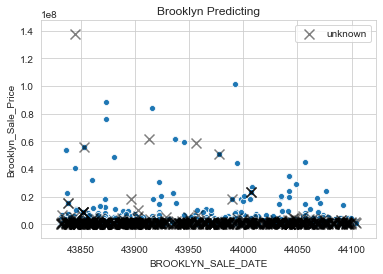

In [68]:
sns.scatterplot(data=data_we_know, x='BROOKLYN_SALE_DATE', y='Brooklyn_Sale_Price')
plt.scatter(x=blind_data['BROOKLYN_SALE_DATE'], y=blind_data['Brooklyn_Sale_Price'],
            c='black', s=100, alpha=0.5, label='unknown', marker='x')
plt.title("Brooklyn Predicting")
plt.legend()
plt.show()

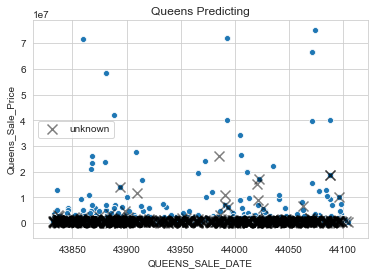

In [77]:
sns.scatterplot(data=data_we_know, x='QUEENS_SALE_DATE', y='Queens_Sale_Price')
plt.scatter(x=blind_data['QUEENS_SALE_DATE'], y=blind_data['Queens_Sale_Price'],
            c='black', s=100, alpha=0.5, label='unknown', marker='x')
plt.title("Queens Predicting")
plt.legend()
plt.show()

#### Using simple plot line to show the increase in the number of COVID cases in Bronx. In the peak of the pandemic, cases were at their highest until June, and beginning to creep up starting in November.

Text(0.5, 1.0, 'Cases in Bronx')

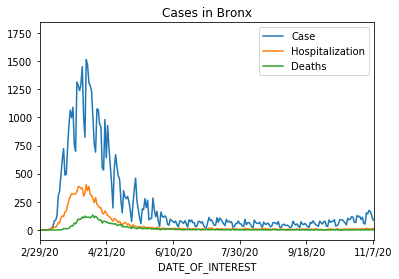

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Bronx = pd.read_csv('Bronx.csv')
Bronx.plot(y=['Case', 'Hospitalization', 'Deaths'], x='DATE_OF_INTEREST')
plt.plot(date, case)
plt.title('Cases in Bronx')

#### From this graph representing the history of COVID-19 information from Bronx, we can see that the total number of cases were at the max in early March and April. Cases, deaths, and hospitalizations all fell since then. However, cases are beginning to slowly creep up.

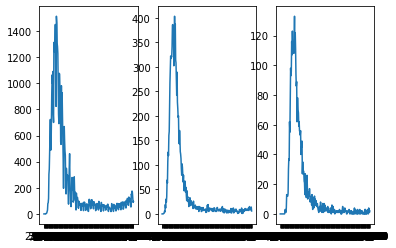

In [56]:
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv('Bronx.csv')
df.head(253)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)

fig, axes = plt.subplots(1,3)
axes[0].plot(df['DATE_OF_INTEREST'], df['Case'])
axes[1].plot(df['DATE_OF_INTEREST'], df['Hospitalization'])
axes[2].plot(df['DATE_OF_INTEREST'], df['Deaths'])

#### Using simple plot line to show the increase in the number of COVID cases in Brooklyn. In the peak of the pandemic, cases were at their highest until June, and beginning to creep up starting in October.

Text(0.5, 1.0, 'Cases in Brooklyn')

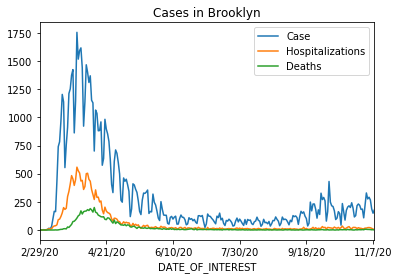

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Brooklyn = pd.read_csv('Brooklyn.csv')
Brooklyn.plot(y=['Case', 'Hospitalizations', 'Deaths'], x='DATE_OF_INTEREST')
plt.plot(date, case)
plt.title('Cases in Brooklyn')

#### From this graph representing the history of COVID-19 information from Brooklyn, we can specifically how the patterns are trending to be for each of the factors we are seeking out. It shows the same pattern of a great increase, then decrease and once again increasing.

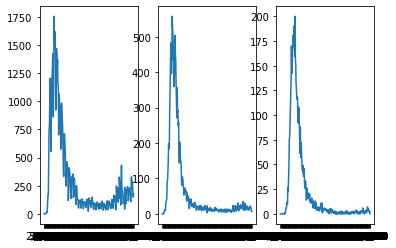

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv('Brooklyn.csv')
df.head(253)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)

fig, axes = plt.subplots(1,3)
axes[0].plot(df['DATE_OF_INTEREST'], df['Case'])
axes[1].plot(df['DATE_OF_INTEREST'], df['Hospitalizations'])
axes[2].plot(df['DATE_OF_INTEREST'], df['Deaths'])

#### Using simple plot line to show the increase in the number of COVID cases in Manhattan. In the peak of the pandemic, cases were at their highest until June, and beginning to creep up starting in November.

Text(0.5, 1.0, 'Cases in Manhattan')

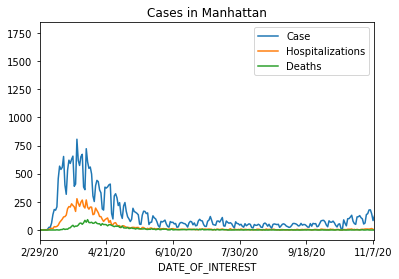

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Bronx = pd.read_csv('Manhattan.csv')
Bronx.plot(y=['Case', 'Hospitalizations', 'Deaths'], x='DATE_OF_INTEREST')
plt.plot(date, case)
plt.title('Cases in Manhattan')

#### From this graph representing the history of COVID-19 information from Manhattan, we can see that the total number of cases were at the max in early March and April. Cases, deaths, and hospitalizations all fell since then. However, cases are beginning to rise up again, especially since October.

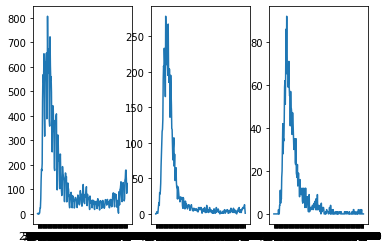

In [59]:
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv('Manhattan.csv')
df.head(253)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)

fig, axes = plt.subplots(1,3)
axes[0].plot(df['DATE_OF_INTEREST'], df['Case'])
axes[1].plot(df['DATE_OF_INTEREST'], df['Hospitalizations'])
axes[2].plot(df['DATE_OF_INTEREST'], df['Deaths'])

#### Using simple plot line to show the increase in the number of COVID cases in Queens. In the peak of the pandemic, cases were at their highest until June, and beginning to creep up starting in October.

Text(0.5, 1.0, 'Cases in Queens')

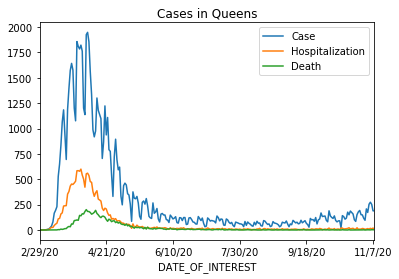

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Bronx = pd.read_csv('Queens.csv')
Bronx.plot(y=['Case', 'Hospitalization', 'Death'], x='DATE_OF_INTEREST')
plt.plot(date, case)
plt.title('Cases in Queens')

#### From this graph representing the history of COVID-19 information from Queens, we can see that the total number of cases were at the max in early March and April. Cases, deaths, and hospitalizations all fell since then. However, cases are beginning to rise up again, especially since October.

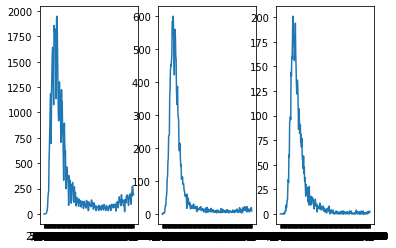

In [65]:
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv('Queens.csv')
df.head(253)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)

fig, axes = plt.subplots(1,3)
axes[0].plot(df['DATE_OF_INTEREST'], df['Case'])
axes[1].plot(df['DATE_OF_INTEREST'], df['Hospitalization'])
axes[2].plot(df['DATE_OF_INTEREST'], df['Death'])

#### Using simple plot line to show the increase in the number of COVID cases in Staten Island. In the peak of the pandemic, cases were at their highest until around May, and beginning to creep up starting in November.

Text(0.5, 1.0, 'Cases in Staten Island')

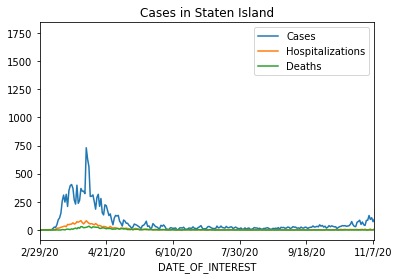

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Bronx = pd.read_csv('StatenIsland.csv')
Bronx.plot(y=['Cases', 'Hospitalizations', 'Deaths'], x='DATE_OF_INTEREST')
plt.plot(date, case)
plt.title('Cases in Staten Island')

#### From this graph representing the history of COVID-19 information from Staten Island, we can see that the total number of cases were at the max in early March and April. Cases, deaths, and hospitalizations all fell since then. However, cases are beginning to rise up again, especially since November. This is definitely an important trend to follow as the cases are once again beginning to increase.

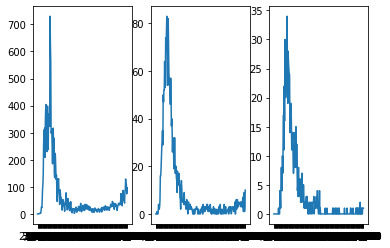

In [70]:
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv('StatenIsland.csv')
df.head(253)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)

fig, axes = plt.subplots(1,3)
axes[0].plot(df['DATE_OF_INTEREST'], df['Cases'])
axes[1].plot(df['DATE_OF_INTEREST'], df['Hospitalizations'])
axes[2].plot(df['DATE_OF_INTEREST'], df['Deaths'])

#### Through the next graph, we see that the red and blue (Queens and Brooklyn) look to be at the highest overall. They are trending on the higher end, especially for the cases happening.

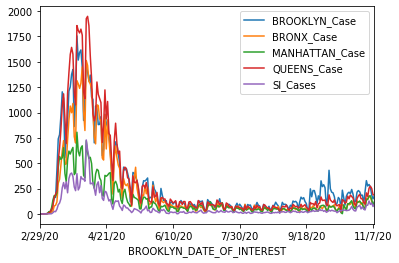

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Citycases.csv')
data


data.plot(y=['BROOKLYN_Case', 'BRONX_Case', 'MANHATTAN_Case', 'QUEENS_Case', 'SI_Cases'], x='BROOKLYN_DATE_OF_INTEREST')

#### Individually looking at the number of cases that occurred, it is quite clear that Brooklyn and Queens saw their peak at the greatest levels, eaching up to almost 2000 cases at one point.

[0, 253, 0, 3000]

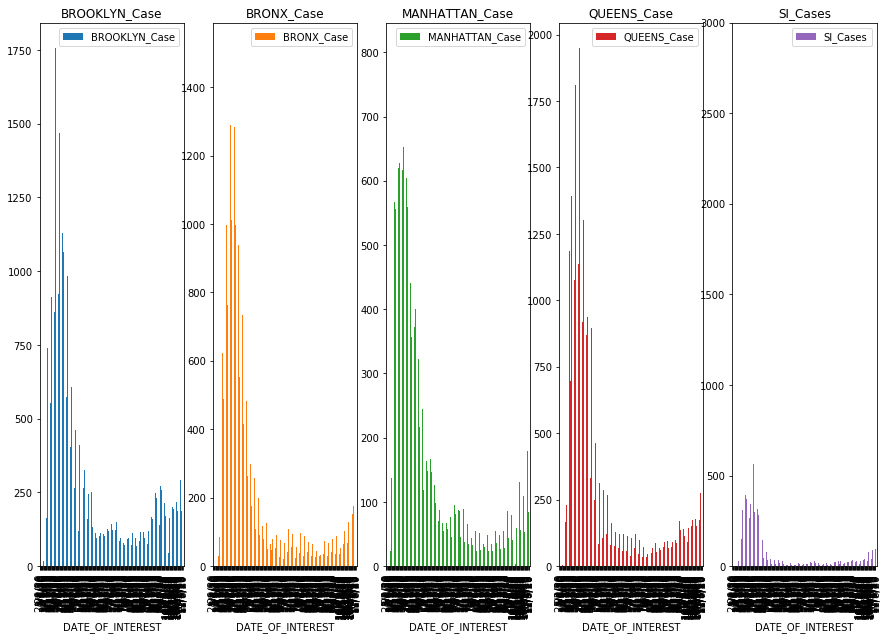

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Citycases.csv')
data

data.plot.bar(y=['BROOKLYN_Case','BRONX_Case','MANHATTAN_Case','QUEENS_Case', 'SI_Cases'], x='DATE_OF_INTEREST', subplots=True, layout=(1,5), figsize=(15,10))
plt.axis([0, 253, 0, 3000])

## So from the information we have been able to see so far:

## Brooklyn, Queens and Staten Island have seen a dip in average real estate sale price.
## Brooklyn and Queens saw some of the highest reported cases, deaths, and hospitalizations.

## We cannot assume correlation however we can definitely tell that there is a relationship between the two factors. Real estate prices did decrease from before, as the the COVID-19 cases hit the boroughs (especially Brooklyn and Queens).

### Reference and Sites


https://dqydj.com/historical-home-prices/

https://www.cdc.gov/nchs/nvss/vsrr/covid_weekly/index.htm

https://www1.nyc.gov/site/doh/covid/covid-19-data.page

www.zillow.com - home prices

https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

https://automatetheboringstuff.com/chapter12/

https://towardsdatascience.com/simple-data-visualisation-with-pandas-7a7a035bdc39

https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e

https://datatofish.com/line-chart-python-matplotlib/

https://ny.curbed.com/2019/12/13/21009872/nyc-home-value-2010s-manhattan-apartments

https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners

Textbook and class notes included.